In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/dataset/fruit_data.zip .

In [ ]:
!unzip fruit_data.zip

Archive:  fruit_data.zip
   creating: fruit_data/
   creating: fruit_data/train/
   creating: fruit_data/train/freshoranges/
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-13 at 12.08.09 AM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-13 at 12.08.29 AM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-13 at 12.00.23 AM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-12 at 11.59.54 PM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-12 at 11.56.02 PM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-12 at 11.50.28 PM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-12 at 11.53.33 PM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-12 at 11.52.21 PM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-13 at 12.04.51 AM.png  
  inflating: fruit_data/train/freshoranges/Screen Shot 2018-06-13 at 12.10.10 AM.png  
  inf

In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
train_data_dir = './fruit_data/train'

In [ ]:
validation_data_dir = './fruit_data/valid'

In [ ]:
import tensorflow as tf
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 6
input_shape = (224, 224, 3)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_data_dir = './fruit_data/train'
validation_data_dir = './fruit_data/valid'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

_, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy: %.2f%%" % (accuracy * 100))


94765736/94765736 [==============================] - 5s 0us/step
Found 1182 images belonging to 6 classes.
Found 329 images belonging to 6 classes.
Epoch 1/100
36/36 [==============================] - 69s 519ms/step - loss: 5.5025 - accuracy: 0.7052 - val_loss: 6024257.5000 - val_accuracy: 0.2062
Epoch 2/100
36/36 [==============================] - 15s 400ms/step - loss: 0.9399 - accuracy: 0.8104 - val_loss: 44856.2422 - val_accuracy: 0.2062
Epoch 3/100
36/36 [==============================] - 14s 387ms/step - loss: 0.9615 - accuracy: 0.8270 - val_loss: 5.3682 - val_accuracy: 0.1344
Epoch 4/100
36/36 [==============================] - 14s 400ms/step - loss: 0.3910 - accuracy: 0.9080 - val_loss: 51.5659 - val_accuracy: 0.2094
Epoch 5/100
36/36 [==============================] - 14s 377ms/step - loss: 0.2926 - accuracy: 0.9330 - val_loss: 46.7605 - val_accuracy: 0.2094
Epoch 6/100
36/36 [==============================] - 15s 401ms/step - loss: 0.1557 - accuracy: 0.9513 - val_loss: 19.650

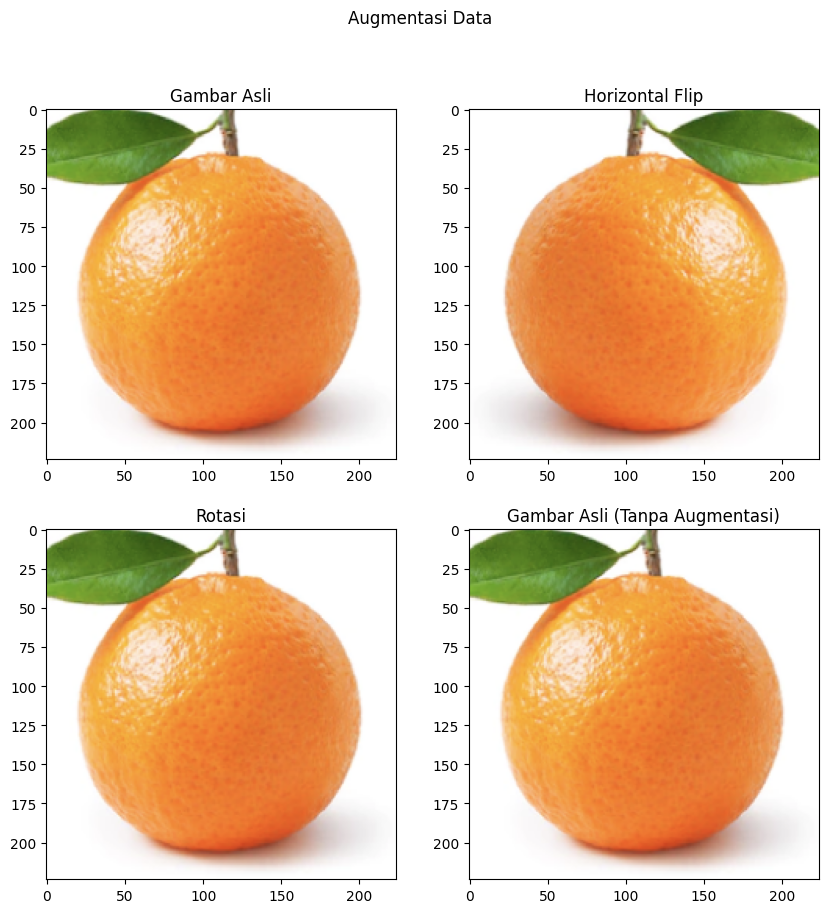

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan kurva loss
epochs = 50
sns.lineplot(x=range(1, epochs+1), y=history.history['loss'])
sns.lineplot(x=range(1, epochs+1), y=history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel("EPOCH")
plt.ylabel("Loss")
plt.title("Kurva Loss")
plt.show()